<center>
    <img src="https://cds.cern.ch/record/1306150/files/cmsLogo_image.jpg" width="300" alt="cognitiveclass.ai logo"  />
    
</center>

# Pile Up Study at the CMS experiment in 2018

### importing libraries and classes


In [1]:
from __future__ import annotations
import uproot
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import plotly
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


from plotly.subplots import make_subplots
from typing import overload
from abc import ABC, abstractmethod
import sympy
from sympy.integrals.transforms import laplace_transform
import random
import math
from tqdm.auto import tqdm, trange
from concurrent.futures import ThreadPoolExecutor
import scipy.stats as stats
from scipy.optimize import curve_fit


from Class1 import parametricValue

    
from Class1 import fixedValue


from Class1 import parametricValueNumpy


from Class1 import parametricValueSympy


#these are important for me

from Class1 import binning


from Class1 import discretepdf


from Class1 import NLL


from Class1 import lumiDist


from Class1 import lumiDistSympyLaplace


from Class1 import lumiDistNumpy


from Class1 import SimulationVSPu


In [2]:
from Class1 import RunInfo


## choosing Runs and Eras

In [3]:
from allInfo import GetAllRuns, GetAllEras

year =2018
GetAllEras(year)

['B', 'A']

In [4]:
# year = 2018
# eras = GetAllEras(year)
# era = '1'
# allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )

In [5]:
year =2018
eras = ['A' , 'B']
# for era in GetAllEras(year):
for era in eras:
    allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
    print(era, ':' , allRuns)

A : [315257, 315259, 315264, 315265, 315267, 315270, 315322, 315339, 315357, 315361, 315363, 315366, 315420, 315488, 315489, 315490, 315506, 315510, 315512, 315543, 315555, 315556, 315557, 315640, 315641, 315642, 315644, 315645, 315646, 315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705, 315713, 315721, 315741, 315764, 315770, 315784, 315785, 315786, 315790, 315800, 315801, 315840, 315973, 315974, 316058, 316059, 316060, 316061, 316062, 316082, 316110, 316111, 316113, 316114, 316153, 316186, 316187, 316199, 316200, 316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240, 316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379, 316380, 316455, 316457, 316469, 316470, 316472, 316505, 316569, 316590, 316613, 316615, 316666, 316667, 316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719, 316720, 316721, 316722, 316723, 316758, 316766, 316876, 316877, 316879, 316928, 316985, 316993, 316994, 316995]
B : [317080, 317087, 317089, 317182, 317212, 317213, 317279

In [6]:
A_allRuns = sorted( list(set( GetAllRuns(2018 , 'A') ) ) )
B_allRuns = sorted( list(set( GetAllRuns(2018 , 'B') ) ) )
print('era A has {0} runs'.format(len(A_allRuns)))
print('era B has {0} runs'.format(len(B_allRuns)))

era A has 117 runs
era B has 43 runs


In [7]:
Runs = allRuns[: :5]
Runs

[317080, 317213, 317319, 317382, 317438, 317527, 317648, 317683, 318876]

In [8]:
year , era = 2018 , 'A'
allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
allRuns = allRuns[22:24]
allRuns

[315557, 315640]

In [9]:
allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
Runs = allRuns[23:28]
if len(Runs) == 1:
    ind = allRuns.index(Runs[0])
    runName = 'RunNo:{0}'.format(ind+1)
else:
    runName = 'nRuns={0}'.format(len(Runs))
runName

'nRuns=5'

## Run Cell

In [10]:
web1 = '/eos/user/c/cmstandi/SWAN_projects/Nima/PUFit' # source directory
web2 = '/eos/user/c/cmstandi/www/PU/newres/New' # publish directory

#Experiment Number:
expN = 14 # change this every time you want to run new feature. 

from pathlib import Path

import sys
sys.path.append('../nTuplizer')

from allInfo import GetAllRuns, GetAllEras

def export_graph(g , n , pname, pdir):
    ghtml = g.to_html()
    Path('{0}/{1}/'.format(pdir , pname) ).mkdir(parents=True, exist_ok=True)
    with open('{0}/{1}/{2}.html'.format(pdir , pname , n) , 'w') as f:
        f.write(ghtml)
def publish_res(rinfo , gchi2 , vname ,  name , publish_dir):

    
    
    
    gg = rinfo.plot_lumi_distribution(subRuns=-1 , colorLumiScale=4 , density=False)
    
    # updated plot layout in Class1
#     gg.update_layout(
#         title="Distribution of BX luminosity",
#         xaxis_title='luminosity (1/mb 1/25ns)',
#         yaxis_title="probability",
#         legend_title="Runs",
#     )
    export_graph(gg , '01-lumi_distribution' , name , publish_dir)
    
    
    
    
    #02-pu_distribution
    
    gg = rinfo.plotPUDists(70)
    export_graph(gg , '02-pu_distribution' , name , publish_dir)
    
    
    
    
    
    #03-{vname}_distribution:
    
    if rinfo.parentRun is None:
        gg = rinfo.plotDataDist(zoom=True)
        export_graph(gg , '03-{0}_distribution'.format(vname) , name , publish_dir) 

    
    
    
    #04-{vname}_predictions:

    gg = rinfo.plotPredictions([60,65,75,80,90])
    export_graph(gg , '04-{0}_predictions'.format(vname) , name , publish_dir)
    
        
        
        
        
    for _xsec in [60,65,75,80,90]:
        gg = rinfo.plotRunPredictions(_xsec)
        export_graph(gg , '05-{0}_predictions_xsec{1}'.format(vname , _xsec) , name , publish_dir)
            
    
    
    export_graph(gchi2 , '06-bestfit_details'  , name , publish_dir)
    export_graph(rinfo.postFitPlots(), '07-postFit_plots'  , name , publish_dir)
    export_graph(rinfo.pullPlots(50 , 1.3) , '08-pullPlots' , name , publish_dir)
    export_graph(rinfo.NadjiehPullPlots(50 , 1.3) , '08-NadjiehPullPlots' , name , publish_dir)
    
    
    
    
    
    if rinfo.parentRun is None:
        export_graph(rinfo.aggregateFitRes() , '09-summary1' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes2() , '09-summary2' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes3() , '09-summary3' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes4() , '09-summary4' , name ,publish_dir)
        
        
   
rinfo = None
        
def process_and_publish(year , era , vname , vmin , vmax , vnbins , pu_max ,
                        lumiName = 'PHYSICSDel' , 
#                         lumiQ =  np.array([0,0.2,0.6,1.0]) ,
                        lumiQ =  np.array([0,0.01 , 0.1,0.35 , 0.5,0.6,0.8 , 0.9,1.0]) ,
#                         lumiQ =  np.array([0,1.0]) ,
                        lnbins_per_q = 20 ,
                        xsec = np.arange(30,100,1), nthreads = 30 , publish_dir = web2 ):
    nbins = lumiQ.size -1
  #  print(nbins)  
    
    #Runs
    allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
#     Runs = allRuns[:]
    Runs = allRuns[20:21]
    if len(Runs) == 1:
        ind = allRuns.index(Runs[0])
        runName = 'RunNo:{0}'.format(ind+1)
    else:
        runName = 'nRuns={0}'.format(len(Runs))
    runName
    
    
    
    head = 'expe={0}_{1}{2}_nLumiBins={3}_{4}'.format(expN,era, year,nbins , runName)
    name = '{0}/{1}'.format(head, vname)
    
    
    #00simulation plot:
    
    var_bins = np.linspace(vmin,vmax,vnbins+1)
    simDist = SimulationVSPu(vname , year = year , var_bins=var_bins , pu_max=pu_max , nthreads=nthreads)


    g = simDist.plot(param=1 , label = 'PU = 1')
    for i in range(10,90+1,10):
        theName = 'PU = {0}'.format(i)
        simDist.plot(param=i , g=g , 
                     scatterOpts={ 'name':theName}
                    )

    g.update_layout(
        title="Simulated distribution for PU ",
        xaxis_title= vname,
        yaxis_title="probability",
        legend_title="PU number",
    )    
    export_graph(g , '00-Simulation' , name , publish_dir )
    
    
    
    

    
    
    
    print('is going to run over {0} runs'.format( len(Runs)) )
    print('Number of Lumi Bins = {0}'.format(nbins))

    
    rinfo = RunInfo(0 , vname , var_bins , lumiName ,lumiQ , nbins_perq=lnbins_per_q , sub_runs=Runs , 
                    nthreads=nthreads , xsecs = xsec)
    
    rinfo.setSimulation(simDist)
    gchi2 = rinfo.fit()
    
#     print(vname)
#     print(var_bins)
#     print(lumiName)
#     print(lumiQ)
#     print(lnbins_per_q)
    
    try:
        
        publish_res(rinfo , gchi2 , vname , name , publish_dir)
        for sr in rinfo._subRuns : #+ rinfo._subRunsSameLumiBins:
            #ext = '/SRSimilarBinning' if sr._isSecondHand else '/SRSameBinning'
            publish_res(sr , None , vname , vname , '{0}/{1}/Runs/Run{2}'.format(publish_dir , head , sr.run) )
    except Exception as e:
        print(e)
        return head, rinfo

    #del rinfo
    #del simDist
    

    return head, rinfo
 

    

In [11]:
variables = { 
              "nVertices" : ( "nVertices" , 90 , 0 , 90 ) ,
              "nGoodVertices" : ("nGoodVertices", 80, 0 , 80) ,
              "nEles" : ("nEles" , 10 , 0 , 10 ) ,
              "nMus" : ("nMus" , 10 , 0 , 10 ),
              "nChargedHadrons" : ("nChargedHadrons" , 120 , 0 , 1200 ),
              "nLostTracks": ("nLostTracks" , 35 , 0 , 35 ),
              "nPhotons" : ("nPhotons" , 120 , 0 , 600 ),
              "nNeutralHadrons" : ("nNeutralHadrons" , 60 , 0 , 120 ),
              "fixedGridRhoAll" : ("fixedGridRhoAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAll" : ("fixedGridRhoFastjetAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAllCalo" : ("fixedGridRhoFastjetAllCalo" , 25 , 0 , 25 ),
              "fixedGridRhoFastjetCentral" : ("fixedGridRhoFastjetCentral" , 50 , 0 , 50 ),
              "fixedGridRhoFastjetCentralCalo" : ("fixedGridRhoFastjetCentralCalo" , 20 , 0 , 20 ),
              "fixedGridRhoFastjetCentralChargedPileUp" : ("fixedGridRhoFastjetCentralChargedPileUp" , 35 , 0 , 35 ),
              "fixedGridRhoFastjetCentralNeutral" : ("fixedGridRhoFastjetCentralNeutral" , 12 , 0 , 12 )
            }

vvv = {}
year , era = 2018 , 'B'
for v,vinfo in variables.items():
     head , vvv[v]  = process_and_publish(year , era , vinfo[0] , vinfo[2] , vinfo[3] , vinfo[1] , 90  )
        

  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 1 runs
Number of Lumi Bins = 8


  0%|          | 0/21 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/8 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


## name of this Experiment: uses in naming folders

In [12]:
head

'expe=14_B2018_nLumiBins=8_RunNo:21'

## making directories for overviewPlots both in source and publish directories

In [13]:
# overview for publishL
import os

directory = "{0}/overview".format(head)
  
# Parent Directory path
parent_dir = web2
  
# Path
path = os.path.join(parent_dir, directory)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

[Errno 17] File exists: '/eos/user/c/cmstandi/www/PU/newres/New/expe=14_B2018_nLumiBins=8_RunNo:21/overview'


In [14]:
#overviewPlots for source
import os

directory1 = 'overviewPlots/{0}'.format(head)
  
# Parent Directory path
parent_dir1 = web1
  
# Path
path = os.path.join(parent_dir1, directory1)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

[Errno 17] File exists: '/eos/user/c/cmstandi/SWAN_projects/Nima/PUFit/overviewPlots/expe=14_B2018_nLumiBins=8_RunNo:21'


## Luminosity and PileUp dists:

In [15]:
def export_Graph(g , n , pdir):
    ghtml = g.to_html()
    Path('{0}/'.format(pdir ) )
    with open('{0}/{1}.html'.format(pdir , n) , 'w') as f:
        f.write(ghtml)

In [16]:
G = vvv['nVertices'].lumi_distribution.plot()
export_Graph(G , 'LumiDist', '{0}/{1}/'.format(parent_dir,directory))
G


In [17]:
G = vvv['nVertices'].plot_lumi_distribution()
export_Graph(G , 'LumiDistMain', '{0}/{1}/'.format(parent_dir,directory))
G


In [18]:
xsec = 70
G = vvv['nVertices'].plotPUDists(xsec)
# vvv['nVertices'].plotDataDist()

export_Graph(G , 'PUDist({0})'.format(xsec) , '{0}/{1}/'.format(parent_dir,directory))
# export_Graph(G , 'PUDist({0})'.format(xsec) , '{0}/{1}/'.format(parent_dir1,directory1))

G

## Creating overview plot for all lumi bins:

15
8


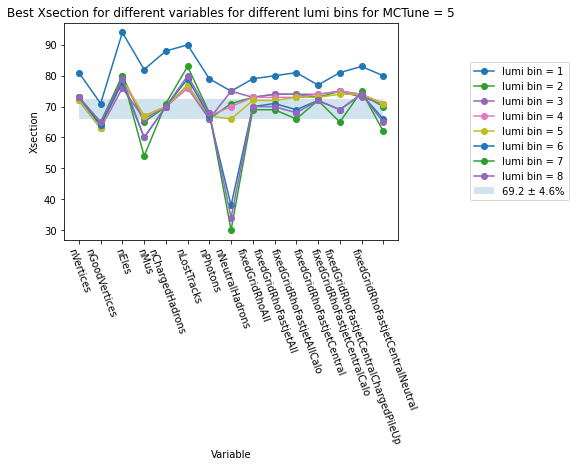

In [19]:
#total plots export

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)
for key in vvv:
    for i in range(vvv[key].nLumiBins):
#         print(i)
        if i == 20 - 1:
            print(i)
print(vvv[key].nLumiBins)
for i in range(vvv[key].nLumiBins):
    for key in vvv:
#         keys.append('{0} for lumi bin = {1} '.format(vvv[key].vname , i+1))
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)
#     print('values for bin = {0} is: {1}'.format(i+1 , values))
#     print('------------------------------------')
#     print('variables for bin = {0} is: {1}'.format(i+1 , keys))
#     print('------------------------------------')
    XsecBest= {}
    for q in range(len(keys)):
        XsecBest[keys[q]] = values[q]
    
#     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
#     print('------------------------------------')




    names = list(XsecBest.keys())
    values = list(XsecBest.values())


    #         print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

    plt.plot(names , values ,'o-' , label='lumi bin = {0}'.format(i+1))
    plt.xticks(rotation=290)

    plt.xlabel("Variable")
    plt.ylabel("Xsection")
    plt.title("Best Xsection for different variables for different lumi bins for MCTune = 5")

    y_est = 69.2 #cross section
    y_err = 69.2*.046 #cross section error

    plt.plot(y_est, '-')

#     plt.show()
   
    #     plt.close(fig)
    
#     fig.write_html('/plot for lumi =1')

#     plt.savefig('XSection Best fit for lumi = {0}.png'.format(i+1))
    keys = []
    values = []
plt.fill_between(names, y_est - y_err, y_est + y_err, alpha=0.2 , label = u'69.2 \u00B1 4.6%' )
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.savefig('{0}/{1}/totallumi.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.savefig('{0}/{1}/totallumi.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file

# print(keys)
# print(values)
#     print(values)
for i in range(len(keys)):
    XsecBestTot[keys[i]] = values[i]

# print(XsecBestTot)


## Creating overview plot for each lumi bins:

15


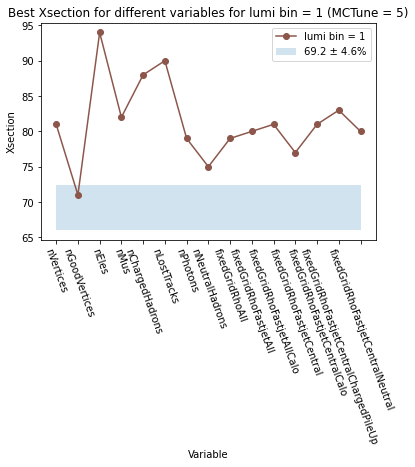

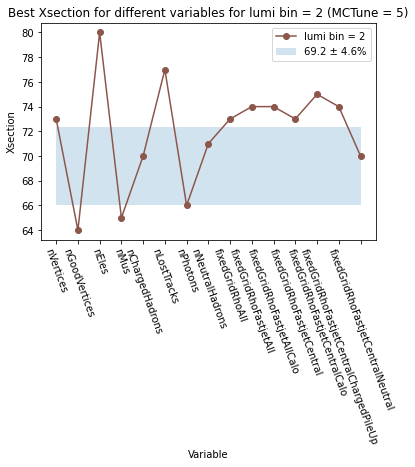

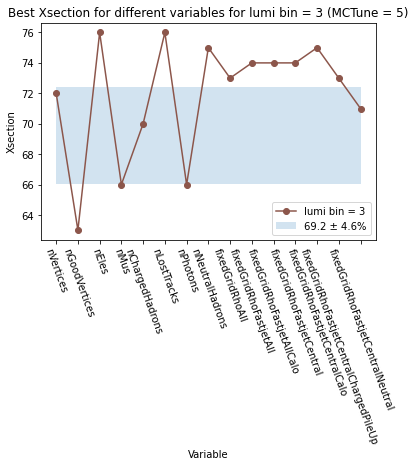

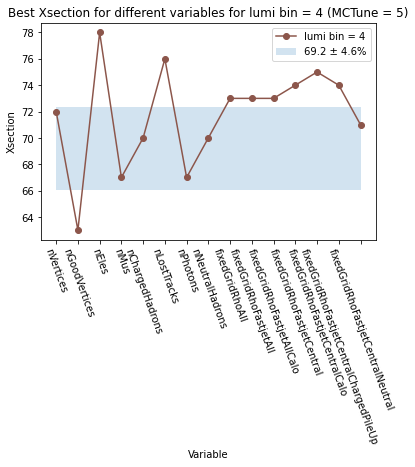

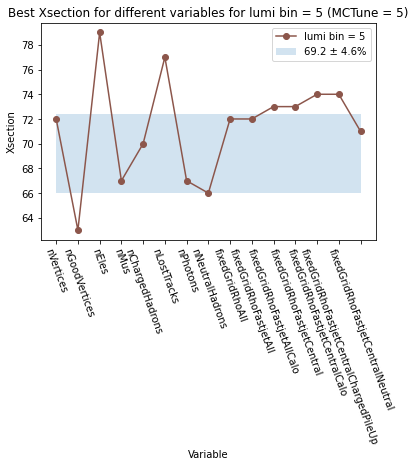

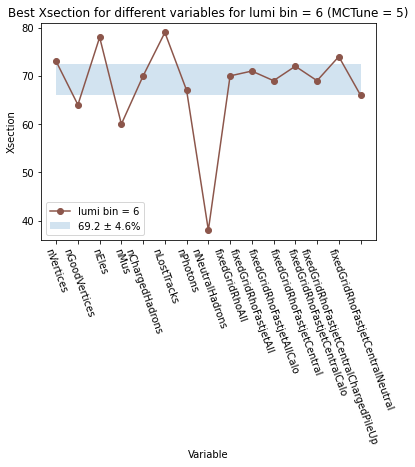

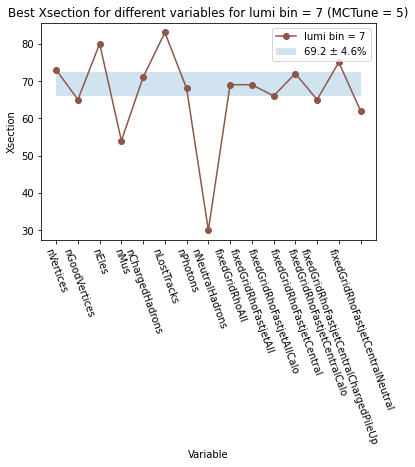

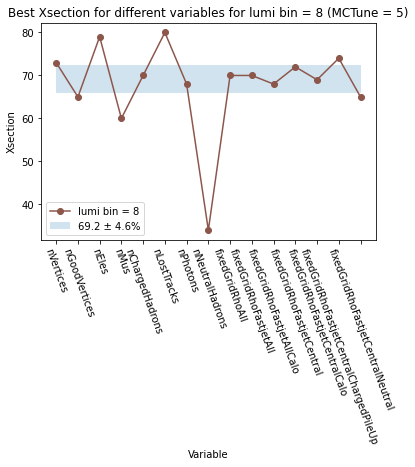

In [20]:
#plot for each lumi bin

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
#         keys.append('{0} for lumi bin = {1} '.format(vvv[key].vname , i+1))
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)
#     print('values for bin = {0} is: {1}'.format(i+1 , values))
#     print('------------------------------------')
#     print('variables for bin = {0} is: {1}'.format(i+1 , keys))
#     print('------------------------------------')
    XsecBest= {}
    for q in range(len(keys)):
        XsecBest[keys[q]] = values[q]
    
#     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
#     print('------------------------------------')




    names = list(XsecBest.keys())
    values = list(XsecBest.values())


    #         print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

    plt.plot(names , values ,'o-' , color='tab:brown' , label='lumi bin = {0}'.format(i+1))
    plt.xticks(rotation=290)

    plt.xlabel("Variable")
    plt.ylabel("Xsection")
    plt.title("Best Xsection for different variables for lumi bin = {0} (MCTune = 5)".format(i+1))

    y_est = 69.2 #cross section
    y_err = 69.2*.046 #cross section error

    plt.plot(y_est, '-')
    plt.fill_between(names, y_est - y_err, y_est + y_err, alpha=0.2 , label = u'69.2 \u00B1 4.6%' )

    plt.legend()
#     plt.savefig('{0}/{1}/plot_for_lumi_{2}.png'.format(parent_dir,directory,i+1) , dpi=300, bbox_inches='tight')
#     plt.savefig('{0}/{1}/plot_for_lumi_{2}.png'.format(parent_dir1,directory1,i+1) , dpi=300, bbox_inches='tight')   # save the figure to file

    plt.show()

    
#     fig.write_html('/plot for lumi =1')

#     plt.savefig('XSection Best fit for lumi = {0}.png'.format(i+1))
    keys = []
    values = []
# print(keys)
# print(values)
#     print(values)
for i in range(len(keys)):
    XsecBestTot[keys[i]] = values[i]

# print(XsecBestTot)


## Fit Quality for all variables:

### pull plot

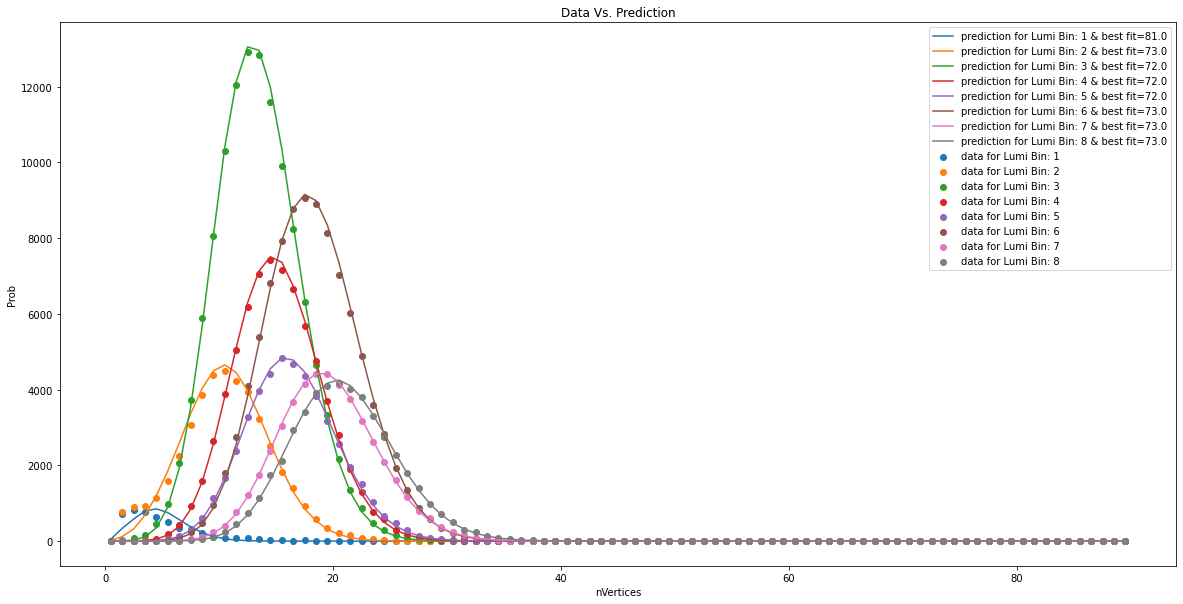

In [21]:
# cross = vvv[variable].fitResults[lumi_bin].bestFit
plt_1 = plt.figure(figsize=(20, 10))
variable = 'nVertices'
bin_Representative = vvv[variable].data_hists[i].binRepresentatives
for i in range(vvv[variable].nLumiBins):
    norm = vvv[variable].data_hists[i].integral()
    data_list=vvv[variable].data_hists[i].allProbs()
    pre_list = vvv[variable].predictions[i].allProbs(param=vvv[variable].fitResults[i].bestFit)
    pre_list_norm = norm *pre_list
    plt.scatter(bin_Representative , data_list , label =  'data for Lumi Bin: {0}'.format(i+1))
    plt.plot(bin_Representative , pre_list_norm , label =  'prediction for Lumi Bin: {0} & best fit={1}'.format(i+1 , vvv[variable].fitResults[i].bestFit))

    
plt.xlabel(variable)
plt.ylabel('Prob')
plt.legend()
plt.title('Data Vs. Prediction')
ax=plt.axes()

# Set color

ax.set_facecolor('white')
plt.savefig('{0}/{1}/dataVpre_{2}.png'.format(parent_dir,directory,variable) , bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
# 
plt.show()

### Fit quality for one variable:

In [22]:
variable = 'nVertices'
maxtoshow=25
smoothing=1.3
Fit = []
fit = 0
for i in range(vvv[variable].nLumiBins):
    
    theName = "Lumi bin = {0}".format(i+1)
    
    dh = vvv[variable].data_hists[i]
    norm = int(dh.integral())
    x = []
    y = []
    
    for b in dh.binRepresentatives:      
        x.append(b)
        data= float( dh.p(b) )
        pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
#         print(pred)
        if pred <=0:
            yval = 0
        else:
            yval = np.absolute(data-pred)/math.sqrt(pred)
        y.append(min(yval , maxtoshow) )
    print(norm)
    print(sum(y))
    fit += (sum(y)/math.sqrt(norm))
Fit.append(fit)
print(Fit)
#     dh.allProbs()
#     plt.plot(x , y , label = theName )
# plt.legend()
# plt.show()

4765
317.6458854229612
42891
210.0176678436823
119141
94.328912186652
71485
48.75540954553988
47654
52.73272750359286
95313
63.4184876426487
47537
38.088743627628475
47541
50.74235220162449
[6.925748444877744]


In [23]:
for variable in vvv:
    print(variable)

nVertices
nGoodVertices
nEles
nMus
nChargedHadrons
nLostTracks
nPhotons
nNeutralHadrons
fixedGridRhoAll
fixedGridRhoFastjetAll
fixedGridRhoFastjetAllCalo
fixedGridRhoFastjetCentral
fixedGridRhoFastjetCentralCalo
fixedGridRhoFastjetCentralChargedPileUp
fixedGridRhoFastjetCentralNeutral


['nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral']
[6.925748444877744, 6.2297843447729155, 0.12682011611711835, 1.133750943933417, 3.737560807425333, 2.819393015074549, 3.688446754924576, 7.4894924202312625, 9.641023829866075, 10.015932918916477, 8.500385639916926, 6.782338824791962, 6.204470002346322, 3.935165931630264, 3.0059318215502335]


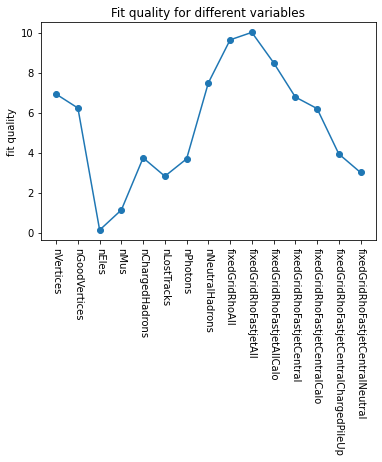

In [24]:
maxtoshow=25
smoothing=1.3
Fit = []
Variables = []
for variable in vvv:
    Variables.append(variable)
    fit = 0
    for i in range(vvv[variable].nLumiBins):

        theName = "Lumi bin = {0}".format(i+1)

        dh = vvv[variable].data_hists[i]
        norm = int(dh.integral())
        x = []
        y = []

        for b in dh.binRepresentatives:      
            x.append(b)
            data= float( dh.p(b) )
            pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
    #         print(pred)
            if pred <= 0:
                yval = 0
            else:
                yval = np.absolute(data-pred)/math.sqrt(pred)
            y.append(min(yval , maxtoshow) )
#         print(norm)
#         print(sum(y))
        fit += (sum(y)/math.sqrt(norm))
    Fit.append(fit)
print(Variables)
print(Fit)



plt.plot(Variables , Fit ,'o-' , label='fit quality')
plt.xticks(rotation=270)

# plt.xlabel("Variable")
plt.ylabel("fit quality")
plt.title("Fit quality for different variables")

plt.savefig('{0}/{1}/FitQuality.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.savefig('{0}/{1}/FitQuality.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file

plt.show()

### Fit for each Lumi bin

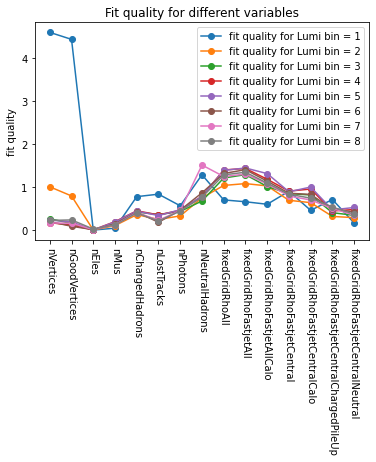

In [25]:
maxtoshow=25
smoothing=1.3

for i in range(vvv[variable].nLumiBins):
    theName = "Lumi bin = {0}".format(i+1)
    Fit = []
    Variables = []
    for variable in vvv:
        Variables.append(variable)
        fit = 0
#     for i in range(vvv[variable].nLumiBins):

        

        dh = vvv[variable].data_hists[i]
        norm = int(dh.integral())
        x = []
        y = []

        for b in dh.binRepresentatives:      
            x.append(b)
            data= float( dh.p(b) )
            pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
    #         print(pred)
            if pred <= 0:
                yval = 0
            else:
                yval = np.absolute(data-pred)/math.sqrt(pred)
            y.append(min(yval , maxtoshow) )
#         print(norm)
#         print(sum(y))
        fit += (sum(y)/math.sqrt(norm))
        Fit.append(fit)
    plt.plot(Variables , Fit ,'o-' , label='fit quality for {0}'.format(theName))
# print(Variables)
# print(Fit)



    
plt.xticks(rotation=270)

# plt.xlabel("Variable")
plt.ylabel("fit quality")
plt.title("Fit quality for different variables")

plt.legend()
plt.savefig('{0}/{1}/FitQuality_eachLumi.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.savefig('{0}/{1}/FitQuality_eachLumi.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.show()

In [26]:
# eAll =vvv['nEles'].data_hists[0].integral()
# print('All electrons:' ,eAll)
# print('All nVertices:' ,vvv['nVertices'].data_hists[0].integral())
# print('All nPhotons:' ,vvv['nPhotons'].data_hists[0].integral())
# print('electrons data:' , vvv['nEles'].data_hists[0].allProbs())
# print('electrons prob:' , vvv['nEles'].predictions[0].allProbs()*eAll)
# datalist1 = vvv['nEles'].data_hists[0].allProbs() / vvv['nEles'].data_hists[0].integral()
# print('electrons datalist normal' , datalist1)
# print(sum(datalist1))


# datalist2 = vvv['nPhotons'].data_hists[0].allProbs() / vvv['nPhotons'].data_hists[0].integral()
# print('Photons datalist normal' , datalist2)
# print(sum(datalist2))

# datalist3 = vvv['nChargedHadrons'].data_hists[0].allProbs() / vvv['nChargedHadrons'].data_hists[0].integral()
# print('nChargedHadrons datalist normal' , datalist3)
# print(sum(datalist3))

# x = len(datalist1)
# xx = np.arange(x)
# print(xx)
# vvv['nVertices'].data_hists[0].plot()


###  Integral for all variable in all Bins:


In [27]:
for i in range(vvv['nVertices'].nLumiBins):
    for key in vvv:
        dh = vvv[key].data_hists[i]
        norm = int(dh.integral())
        print('in LumiBin = {0} integral of varible data: {1} is: {2}'.format(i+1 , key , norm))

in LumiBin = 1 integral of varible data: nVertices is: 4765
in LumiBin = 1 integral of varible data: nGoodVertices is: 4765
in LumiBin = 1 integral of varible data: nEles is: 4765
in LumiBin = 1 integral of varible data: nMus is: 4765
in LumiBin = 1 integral of varible data: nChargedHadrons is: 47650
in LumiBin = 1 integral of varible data: nLostTracks is: 4765
in LumiBin = 1 integral of varible data: nPhotons is: 23825
in LumiBin = 1 integral of varible data: nNeutralHadrons is: 9530
in LumiBin = 1 integral of varible data: fixedGridRhoAll is: 4765
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetAll is: 4765
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetAllCalo is: 4765
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetCentral is: 4765
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetCentralCalo is: 4765
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetCentralChargedPileUp is: 4765
in LumiBin = 1 integral of varible data: fixed

## some features of the code:

In [28]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var: {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var: nVertices in lumi bin = 1 is : 81.0 
best fit for var: nVertices in lumi bin = 2 is : 73.0 
best fit for var: nVertices in lumi bin = 3 is : 72.0 
best fit for var: nVertices in lumi bin = 4 is : 72.0 
best fit for var: nVertices in lumi bin = 5 is : 72.0 
best fit for var: nVertices in lumi bin = 6 is : 73.0 
best fit for var: nVertices in lumi bin = 7 is : 73.0 
best fit for var: nVertices in lumi bin = 8 is : 73.0 
best fit for var: nGoodVertices in lumi bin = 1 is : 71.0 
best fit for var: nGoodVertices in lumi bin = 2 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 3 is : 63.0 
best fit for var: nGoodVertices in lumi bin = 4 is : 63.0 
best fit for var: nGoodVertices in lumi bin = 5 is : 63.0 
best fit for var: nGoodVertices in lumi bin = 6 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 7 is : 65.0 
best fit for var: nGoodVertices in lumi bin = 8 is : 65.0 
best fit for var: nEles in lumi bin = 1 is : 94.0 
best fit for var: nEles in lumi bin =

In [29]:
vvv['nVertices'].subRunNumbers


[317438]

In [30]:
for i in  vvv['nVertices']._subRuns:
    x = i.run
    print(x)
print(len(vvv['nVertices']._subRuns))

317438
1


In [31]:
x = vvv['nVertices'].subRunNumbers
print(x)

[317438]


In [32]:

for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 1 is : 81.0 
best fit for var = nVertices in lumi bin = 2 is : 73.0 
best fit for var = nVertices in lumi bin = 3 is : 72.0 
best fit for var = nVertices in lumi bin = 4 is : 72.0 
best fit for var = nVertices in lumi bin = 5 is : 72.0 
best fit for var = nVertices in lumi bin = 6 is : 73.0 
best fit for var = nVertices in lumi bin = 7 is : 73.0 
best fit for var = nVertices in lumi bin = 8 is : 73.0 
best fit for var = nGoodVertices in lumi bin = 1 is : 71.0 
best fit for var = nGoodVertices in lumi bin = 2 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 63.0 
best fit for var = nGoodVertices in lumi bin = 4 is : 63.0 
best fit for var = nGoodVertices in lumi bin = 5 is : 63.0 
best fit for var = nGoodVertices in lumi bin = 6 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 7 is : 65.0 
best fit for var = nGoodVertices in lumi bin = 8 is : 65.0 
best fit for var = nEles in lumi bin = 1 is : 94.0 
best fit for var = n

In [33]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        if i == 3 - 1:
            print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 3 is : 72.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 63.0 
best fit for var = nEles in lumi bin = 3 is : 76.0 
best fit for var = nMus in lumi bin = 3 is : 66.0 
best fit for var = nChargedHadrons in lumi bin = 3 is : 70.0 
best fit for var = nLostTracks in lumi bin = 3 is : 76.0 
best fit for var = nPhotons in lumi bin = 3 is : 66.0 
best fit for var = nNeutralHadrons in lumi bin = 3 is : 75.0 
best fit for var = fixedGridRhoAll in lumi bin = 3 is : 73.0 
best fit for var = fixedGridRhoFastjetAll in lumi bin = 3 is : 74.0 
best fit for var = fixedGridRhoFastjetAllCalo in lumi bin = 3 is : 74.0 
best fit for var = fixedGridRhoFastjetCentral in lumi bin = 3 is : 74.0 
best fit for var = fixedGridRhoFastjetCentralCalo in lumi bin = 3 is : 75.0 
best fit for var = fixedGridRhoFastjetCentralChargedPileUp in lumi bin = 3 is : 73.0 
best fit for var = fixedGridRhoFastjetCentralNeutral in lumi bin = 3 is : 71.0 


In [34]:
import numpy as np
import matplotlib.pyplot as plt


XsecBest = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)

        
        
        
print(keys)
print(values)

15
['nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nV

In [35]:
for i in range (vvv['nVertices'].nLumiBins):
    print(vvv['nVertices'].data_hists[i].integral())

4765.0
42891.0
119141.0
71485.0
47654.0
95313.0
47537.0
47541.0


In [36]:
vvv['nVertices'].data_hists[0].integral()

4765.0

In [37]:
vvv['nVertices'].predictions

In [38]:
vvv['nVertices'].plotPredictions([45])

In [39]:
vvv['nVertices'].predictions[0].plot()

In [40]:
 vvv['nVertices'].predictions[0].plot(param=vvv['nVertices'].fitResults[0].bestFit ,
                                    norm=vvv['nVertices'].data_hists[0].integral()
                                    )

In [41]:
vvv['nVertices'].predictions[0].plot(norm=vvv['nVertices'].data_hists[0].integral() ,param=vvv['nVertices'].fitResults[0].bestFit)


In [42]:

prelist = vvv['nVertices'].predictions[0].allProbs()
print(prelist)
print(sum(prelist))

[1.56551805e-01 3.59792224e-01 2.47165582e-01 1.39711139e-01
 6.26095996e-02 2.34874037e-02 7.66813302e-03 2.22612592e-03
 5.96793680e-04 1.48906748e-04 3.32594979e-05 7.20690015e-06
 1.46875213e-06 2.89584771e-07 5.16785007e-08 1.02730306e-08
 1.44481545e-09 2.26740643e-10 3.79434149e-11 6.63209298e-12
 6.35119689e-13 1.25789913e-13 1.67555385e-14 5.36202116e-15
 1.35197935e-16 3.47511721e-17 2.81755037e-18 4.92802796e-17
 1.42206012e-20 6.71013540e-22 8.43015312e-22 2.41466025e-23
 6.09837223e-24 6.74297304e-25 2.73208769e-27 4.24165546e-26
 3.50451805e-29 2.00833143e-30 5.82850290e-32 2.66112349e-28
 9.86958648e-33 2.68842467e-35 3.53195620e-35 3.23677051e-35
 2.03796419e-36 4.14227384e-36 1.31695551e-37 2.93989734e-41
 5.81027284e-41 5.35194041e-41 4.66043553e-40 1.40964547e-42
 8.09034793e-44 4.96662048e-45 4.34764327e-45 2.24308998e-46
 4.26729344e-46 4.08894945e-45 1.16441839e-48 2.94033309e-50
 2.78966986e-50 5.66367702e-49 1.38892163e-51 9.07024087e-54
 2.89686075e-54 1.213756

In [43]:
vvv['nVertices'].data_hists[0].plot()


In [44]:
datalist =(vvv['nVertices'].data_hists[0].allProbs())/(vvv['nVertices'].data_hists[0].integral())
print(datalist)
print(sum(datalist))

[0.         0.14774397 0.17355719 0.15886674 0.13221406 0.10577125
 0.07303253 0.05918153 0.04239244 0.02539349 0.01804827 0.01552991
 0.01490031 0.01112277 0.00755509 0.00545645 0.00209864 0.00377754
 0.00125918 0.00125918 0.00041973 0.00041973 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
0.9999999999999999


In [45]:
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = datalist[i] - prelist[i]
        k = m**2
        j = k/datalist[i]
#         print(j)
        n += j
#         print(n)
        m = 0
#         print('-----------')
print(n/len(datalist))

0.007776718241275516


In [46]:
import math 
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = prelist[i] - datalist[i]
#         j = m/math.sqrt(datalist[i])
        j = m/math.sqrt(datalist[i])
        n += j
        m = 0
print(n)

-1.467717281719417


In [47]:
 vvv['nVertices']._subRunsSameLumiBins[0].fitResults

[data: nVertices_run317438_lumi1 best fit: 81.0 +- 1.0,
 data: nVertices_run317438_lumi2 best fit: 73.0 +- 1.0,
 data: nVertices_run317438_lumi3 best fit: 72.0 +- 1.0,
 data: nVertices_run317438_lumi4 best fit: 72.0 +- 1.0,
 data: nVertices_run317438_lumi5 best fit: 72.0 +- 1.0,
 data: nVertices_run317438_lumi6 best fit: 73.0 +- 1.0,
 data: nVertices_run317438_lumi7 best fit: 73.0 +- 1.0,
 data: nVertices_run317438_lumi8 best fit: 73.0 +- 1.0]

In [48]:
vvv['nVertices'].fitResults[0].plot()

In [49]:
vvv['nVertices'].predictions[0].plot()

In [50]:
vvv['nVertices'].data_hists[0].plot()

In [51]:
print(vvv['nVertices'].nLumiBins)

8


In [52]:
vvv['nVertices'].fitResults

[data: nVertices_run0_lumi1 best fit: 81.0 +- 1.0,
 data: nVertices_run0_lumi2 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi3 best fit: 72.0 +- 1.0,
 data: nVertices_run0_lumi4 best fit: 72.0 +- 1.0,
 data: nVertices_run0_lumi5 best fit: 72.0 +- 1.0,
 data: nVertices_run0_lumi6 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi7 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi8 best fit: 73.0 +- 1.0]

In [53]:
simDist = SimulationVSPu('nPhotons' , year = 2018 , var_bins= np.linspace(0,100,101) , pu_max=100 , nthreads=30)

  0%|          | 0/102 [00:00<?, ?it/s, SIMULATION]

In [54]:
aa = simDist.plotEfficiencies()
aa.plot()

In [55]:
for key in variables.keys():
    print('vName: {0}'.format(key))

vName: nVertices
vName: nGoodVertices
vName: nEles
vName: nMus
vName: nChargedHadrons
vName: nLostTracks
vName: nPhotons
vName: nNeutralHadrons
vName: fixedGridRhoAll
vName: fixedGridRhoFastjetAll
vName: fixedGridRhoFastjetAllCalo
vName: fixedGridRhoFastjetCentral
vName: fixedGridRhoFastjetCentralCalo
vName: fixedGridRhoFastjetCentralChargedPileUp
vName: fixedGridRhoFastjetCentralNeutral


In [56]:
MC = SimulationVSPu.mctune
print(MC)

In [57]:
# گرفتن انتگرال pu dist

bina = binning(1 , 2 , 1.5 )
binb = binning(2 , 3 , 2.5)
binc = binning(3, 4 , 3.5)
lumidist = lumiDistNumpy('testlumi' , {bina: 0.33 , binb: 0.33 , binc: 0.33 #lumi bin prob
                                      }, 50 , np.array([1,2,2.5] # pu max and cross section for each bin 
                                                      ))
g = lumidist.PUDist.plot(param = 1)

lumidist.PUDist.plot(param = 2 , g=g )
lumidist.PUDist.plot(param = 3 , g=g )


g.update_layout(
        title="PU dist ",
        xaxis_title= 'PU',
        yaxis_title="probability",
        legend_title="PU number",
    )
g

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

In [58]:
bina.representative

1.5

In [59]:
counter = 0
for b,v in lumidist.PUDist.vals:
    counter +=1
    print(b,v)
print(counter)

(-0.5,0.5:0.0) [0.11068614 0.01895418 0.0084502 ]
(0.5,1.5:1.0) [0.21304753 0.06251326 0.03354233]
(1.5,2.5:2.0) [0.22852369 0.10910039 0.06901271]
(2.5,3.5:3.0) [0.18316954 0.13745984 0.09997089]
(3.5,4.5:4.0) [0.12192863 0.14345922 0.117222  ]
(4.5,5.5:5.0) [0.07031953 0.13332094 0.12093975]
(5.5,6.5:6.0) [0.03579248 0.11405955 0.11530822]
(6.5,7.5:7.0) [0.01625125 0.09076705 0.1038894 ]
(7.5,8.5:8.0) [0.00663747 0.0672398  0.08887788]
(8.5,9.5:9.0) [0.00245693 0.04632235 0.07200863]
(9.5,10.5:10.0) [0.00082989 0.02967565 0.05505275]
(10.5,11.5:11.0) [0.00025737 0.01769932 0.0396286 ]
(11.5,12.5:12.0) [7.36918643e-05 9.84697811e-03 2.68388085e-02]
(12.5,13.5:13.0) [1.95777638e-05 5.12225650e-03 1.71077476e-02]
(13.5,14.5:14.0) [4.84781128e-06 2.49765719e-03 1.02737895e-02]
(14.5,15.5:15.0) [1.12340627e-06 1.14457658e-03 5.82079829e-03]
(15.5,16.5:16.0) [2.44536287e-07 4.94220810e-04 3.11646988e-03]
(16.5,17.5:17.0) [5.01681176e-08 2.01586976e-04 1.57962544e-03]
(17.5,18.5:18.0) [9.73

In [60]:
# how quantile works:
vals = np.array([1,2,3,4,5,6,7,8,9,10])
quantile = np.array([0 , 0.6 , 1])
lim = np.quantile(vals,quantile)
lim

array([ 1. ,  6.4, 10. ])